In [2]:
!pip install pycaret 
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [3]:
from pycaret.utils import version
version()

'3.3.0'

In [4]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [12]:
jewelleryDataSet = get_data("jewellery") 
jewelleryDataSet.to_csv("jewelleryDataSet.csv")
# SN is 30
# This is unsupervised dataset.
# No target is defined.

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [13]:
from IPython.display import FileLink
FileLink("jewelleryDataSet.csv")

C:\Users\pratham\jewelleryDataSet.csv

In [14]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(jewelleryDataSet)

,Description,Value
0,Session id,3675
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [15]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


In [16]:
KMeanClusteringModel = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5849,1199.4251,0.5745,0,0,0


In [17]:
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6377,4632.2753,0.5179,0,0,0


In [18]:
KMeanClusteringModel = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


In [19]:
KMeanClusteringModel = create_model('kmeans', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6061,4780.0826,0.5416,0,0,0


In [20]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 0
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 3
501,93,19934,0.203140,17969.693359,Cluster 0
502,90,35297,0.355149,16091.402344,Cluster 0
503,91,20681,0.354679,18401.087891,Cluster 0


In [22]:
kMeanPrediction.to_csv("kMeansResult.csv")
from IPython.display import FileLink
FileLink("kMeansResult.csv")

C:\Users\pratham\kMeansResult.csv

In [23]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


In [24]:
from IPython.display import FileLink
FileLink('kMeanClusteringModelFile.pkl')

C:\Users\pratham\kMeanClusteringModelFile.pkl

In [25]:
KMeanClusteringModel = load_model('kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Loaded


In [26]:
# Cluster the new dataset 
# Select top 10 rows
newData = get_data("jewellery").iloc[:10]


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [27]:
newPredictions = predict_model(KMeanClusteringModel, data = newData)
newPredictions

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 0
5,29,131578,0.847034,3535.514404,Cluster 1
6,54,76500,0.785198,6878.884277,Cluster 2
7,87,42592,0.355290,18086.287109,Cluster 0
8,83,34384,0.324719,14783.378906,Cluster 0
9,84,27693,0.367063,17879.558594,Cluster 0


In [28]:
newPredictions.to_csv("NewPredictions.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


In [29]:
from IPython.display import FileLink
FileLink("NewPredictions.csv")

C:\Users\pratham\NewPredictions.csv

In [30]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

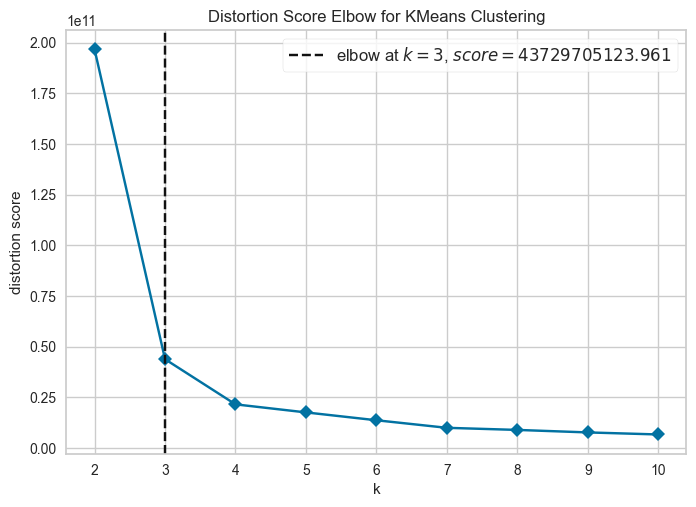

In [31]:
plot_model(KMeanClusteringModel, plot = 'elbow')

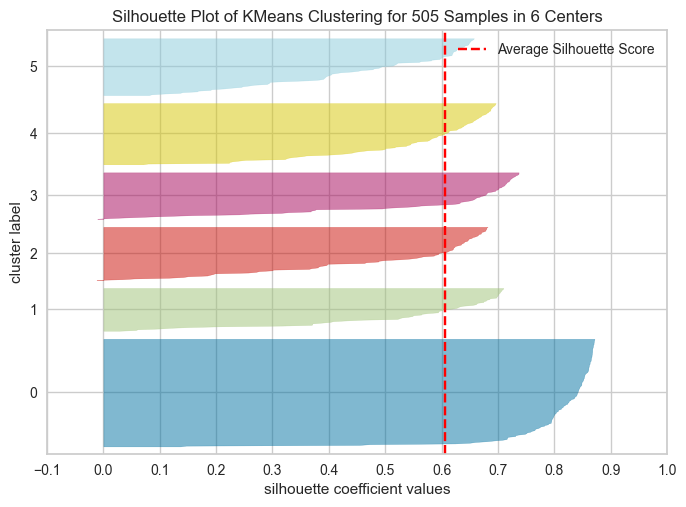

In [32]:
plot_model(KMeanClusteringModel, plot = 'silhouette')

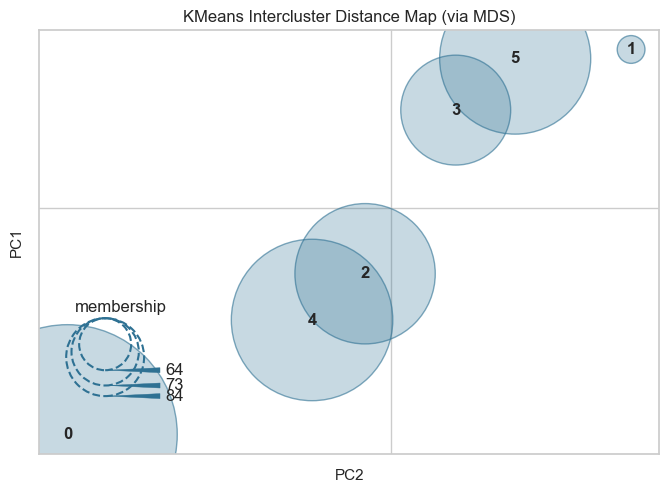

In [33]:
plot_model(KMeanClusteringModel, plot = 'distance') # Rerun the code

In [34]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery', verbose=False)
setup(data = jewelleryDataSet, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6196,4573.6153,0.5572,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5776,4803.6499,0.5714,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


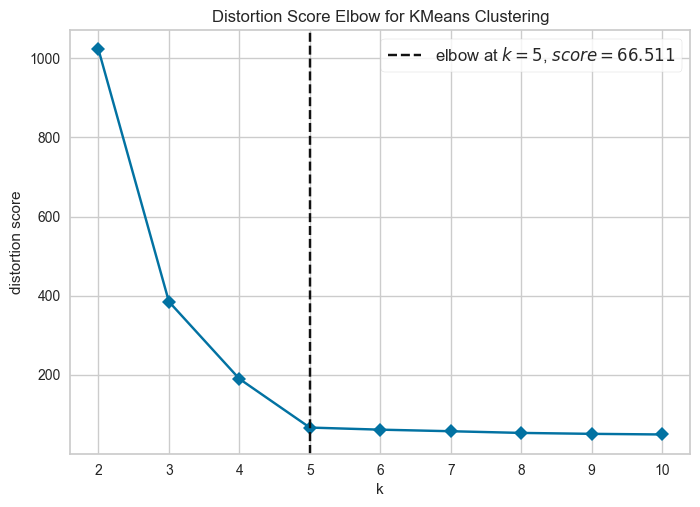

In [40]:
#Normalization
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [38]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6963,1066.5812,0.5258,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6590,3123.6498,0.7322,0,0,0


In [39]:
setup(data = jewelleryDataSet, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


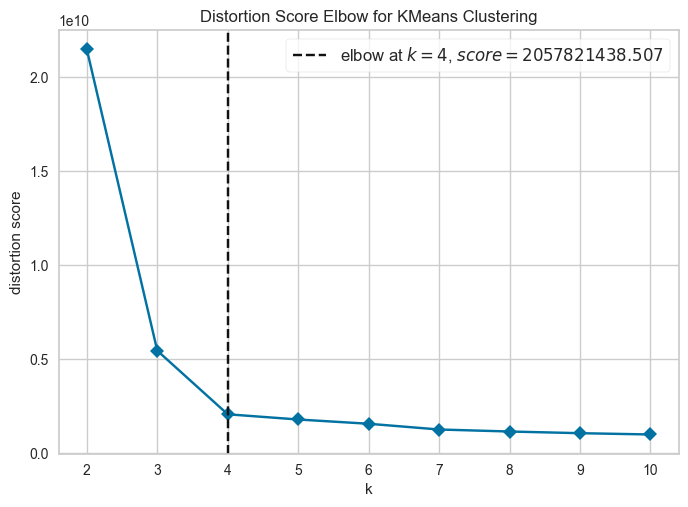

In [41]:
#Transformation
setup(data = jewelleryDataSet, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [42]:
setup(data = jewelleryDataSet, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7383,1843.8285,0.3816,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6488,2973.2417,0.5918,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5244,2868.3980,0.7742,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7217,5009.6748,0.4082,0,0,0


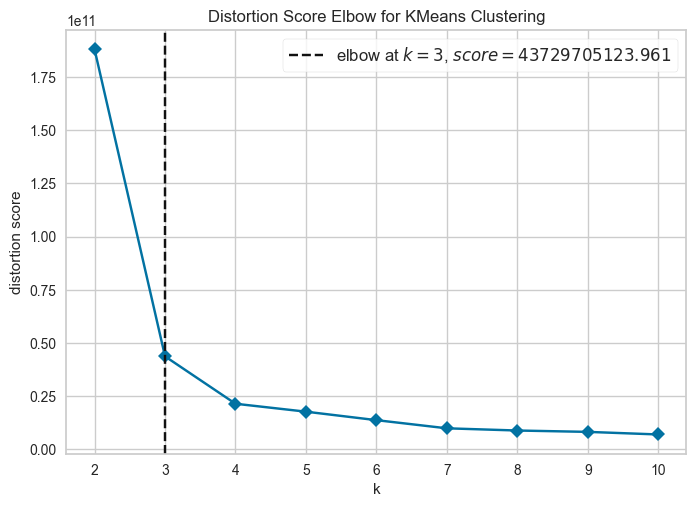

In [43]:
setup(data = jewelleryDataSet, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [44]:
setup(data = jewelleryDataSet, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6377,4632.2753,0.5179,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6063,4780.1767,0.5414,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


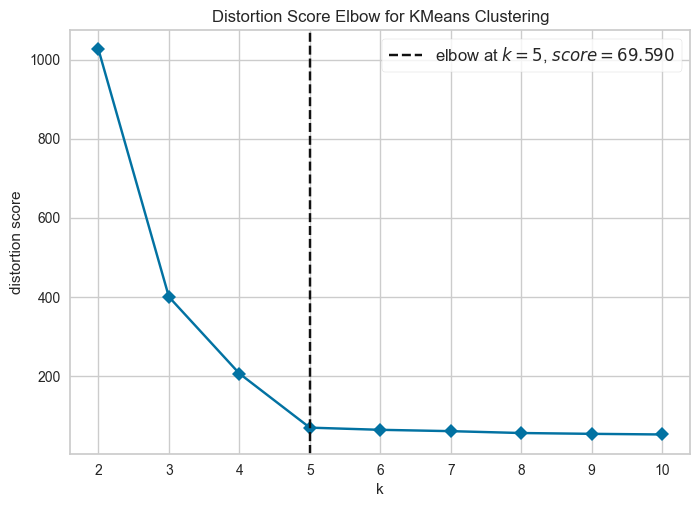

In [45]:
setup(data = jewelleryDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [46]:
setup(data = jewelleryDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6170,2980.5146,0.7369,0,0,0


In [47]:
#Clustering Techniques
# K-Means clustering                 'kmeans'
# Affinity Propagation               'ap'
# Mean shift clustering              'meanshift'
# Spectral Clustering                'sc'
# Agglomerative Clustering           'hclust'
# Density-Based Spatial Clustering   'dbscan'
# OPTICS Clustering                  'optics'
# Birch Clustering                   'birch'
# K-Modes clustering                 'kmodes'

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7060,4827.2243,0.4339,0,0,0


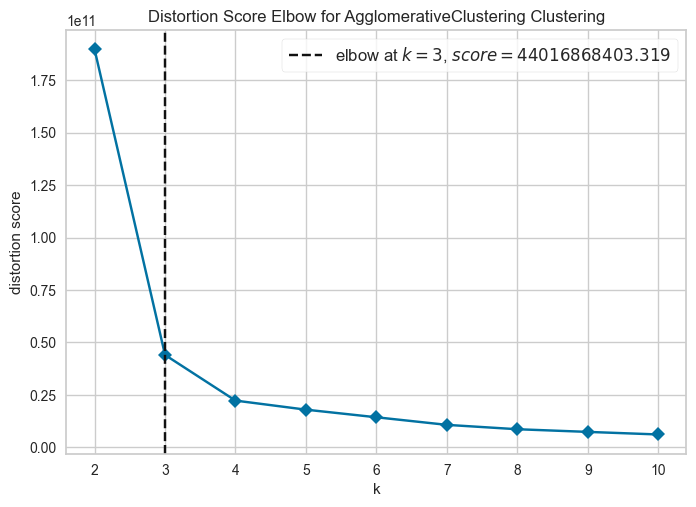

In [48]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery', verbose=False)
setup(data = jewelleryDataSet, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [49]:
hierarchicalModel = create_model('hclust', num_clusters=3)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7391,3542.6251,0.3407,0,0,0


,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 1
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 0
501,93,19934,0.203140,17969.693359,Cluster 1
502,90,35297,0.355149,16091.402344,Cluster 1
503,91,20681,0.354679,18401.087891,Cluster 1


In [52]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery', verbose=False)
setup(data = jewelleryDataSet, verbose=False)
dbscanModel = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [54]:
dbscanModelPrediction = assign_model(dbscanModel)
dbscanModelPrediction

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster -1
1,59,81799,0.791082,5417.661621,Cluster -1
2,62,74751,0.702657,9258.993164,Cluster -1
3,59,74373,0.765680,7346.334473,Cluster -1
4,87,17760,0.348778,16869.507812,Cluster -1
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster -1
501,93,19934,0.203140,17969.693359,Cluster -1
502,90,35297,0.355149,16091.402344,Cluster -1
503,91,20681,0.354679,18401.087891,Cluster -1
